[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/)

# 과제
* 아래 내용에 대해 자유롭게 분석과 시각화를 해주세요.
* 확진일자별 확진자 현황 분석 (Analysis of the status of confirmed patients by confirmed date)
* 지역별 확진자 현황 분석(Analysis of the status of confirmed patients by region)
* 성별, 연령대별 확진자 현황 분석 (Analysis of the status of confirmed patients by gender and age group)
* 감염경로 분석 (infection path analysis)

In [97]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv("gidcc_covid19.csv")
df.shape

(5815, 16)

In [100]:
df.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,1,3.0,M,54,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,NaN,해외유입,grp01,Primary,NaN,Primary
1,2,4.0,M,55,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,NaN,해외유입,grp02,Primary,NaN,Primary
2,3,12.0,M,48,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,NaN,해외유입,grp03,Primary,NaN,Primary
3,4,14.0,F,40,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,NaN,해외유입,grp03,접촉자,NaN,접촉자
4,5,15.0,M,42,40,2020. 2. 2.,2020. 2. 1.,NaN,수원-1,수원장안,NaN,해외유입,grp04,Primary,NaN,Primary


## 1. 확진일자별 확진자 현황 분석

In [101]:
#confirming the columns variables 
df.columns.tolist()

['연번',
 '확진자',
 '성별',
 '나이(만)',
 '연령대',
 '확진일자',
 '증상발현일',
 '무증상/조사중',
 '경기번호',
 '지역',
 '재검출',
 '감염경로',
 'GRP',
 '구분',
 '구분2',
 '구분.1']

In [102]:
#'확진일자'을 기준으로 역순으로 정렬합니다.
df.sort_values('확진일자',ascending = False)
df.head(1)

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,1,3.0,M,54,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,NaN,해외유입,grp01,Primary,NaN,Primary


In [103]:
df['확진일자'].value_counts()

2020. 8. 22.    123
2020. 8. 27.    122
2020. 8. 14.    111
2020. 8. 20.    106
2020. 8. 21.    102
               ... 
2020. 4. 16.      1
2020. 2. 20.      1
2020. 2. 10.      1
2020. 4. 23.      1
2020. 4. 30.      1
Name: 확진일자, Length: 269, dtype: int64

In [104]:
df['확진일자'].head(1)

0    2020. 1. 26.
Name: 확진일자, dtype: object

In [105]:
#str --> datetime
df['확진일자'] = pd.to_datetime(df['확진일자'])
df['확진일자'].head()



0   2020-01-26
1   2020-01-27
2   2020-02-01
3   2020-02-02
4   2020-02-02
Name: 확진일자, dtype: datetime64[ns]

In [106]:
#Adding month column
df['월'] = df['확진일자'].dt.month

In [107]:
#adding week column 
df["주"] = df["확진일자"].dt.week
df.head(1)                ###############

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주
0,1,3.0,M,54,50,2020-01-26,2020. 1. 22.,NaN,고양-1,고양일산서,NaN,해외유입,grp01,Primary,NaN,Primary,1,4


## 확진일자 선그래프 그리기

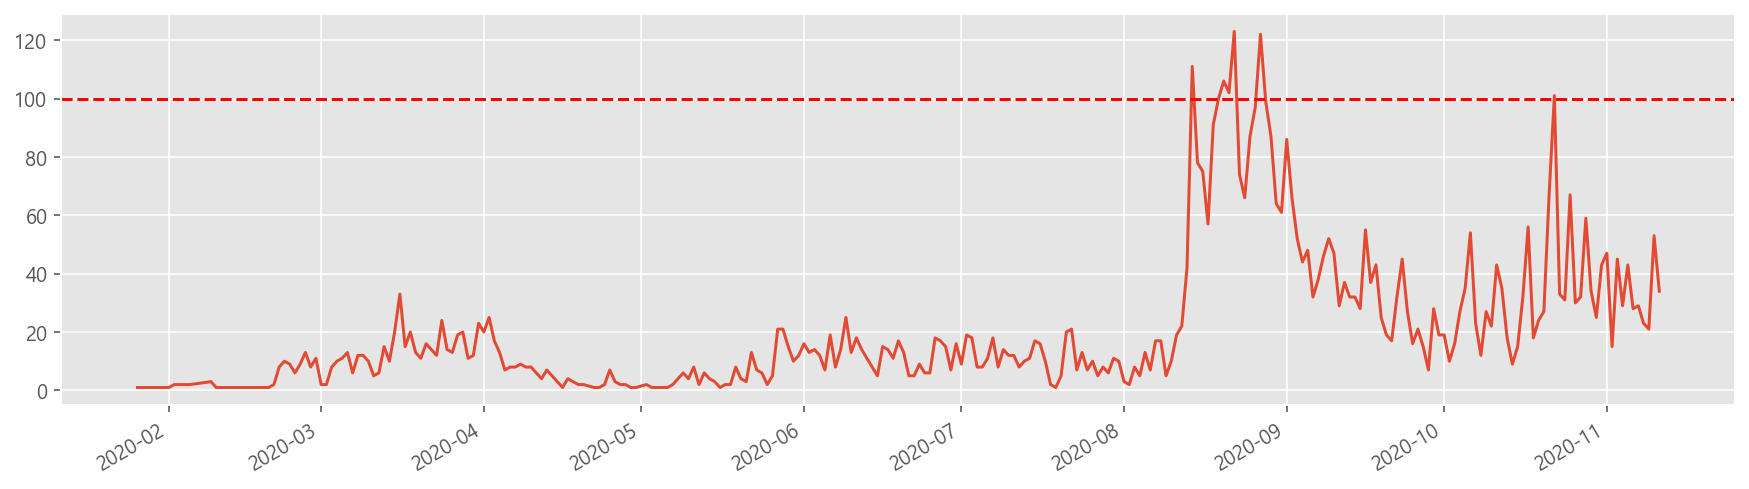

In [108]:
# 확진일자로 선그래프를 그립니다.
day_count = df["확진일자"].value_counts()
day_count.plot(figsize=(15,4))
plt.axhline(y=100, linestyle='--', color='r') ############# how to make it blue??

In [109]:
day = '2020-11-11'
def parse_month_day(day): #parse =parsing is a common programming task that 
                          # splits the given sequence of characters or values (text) 
                          #into smaller parts based on some rules.
        return day[-5:]
parse_month_day(day)

'11-11'

In [110]:
df['월일'] = df['확진일자'].astype(str).map(parse_month_day) #????mapping function??
df[['확진일자','월일']].head()

,확진일자,월일
0,2020-01-26,01-26
1,2020-01-27,01-27
2,2020-02-01,02-01
3,2020-02-02,02-02
4,2020-02-02,02-02


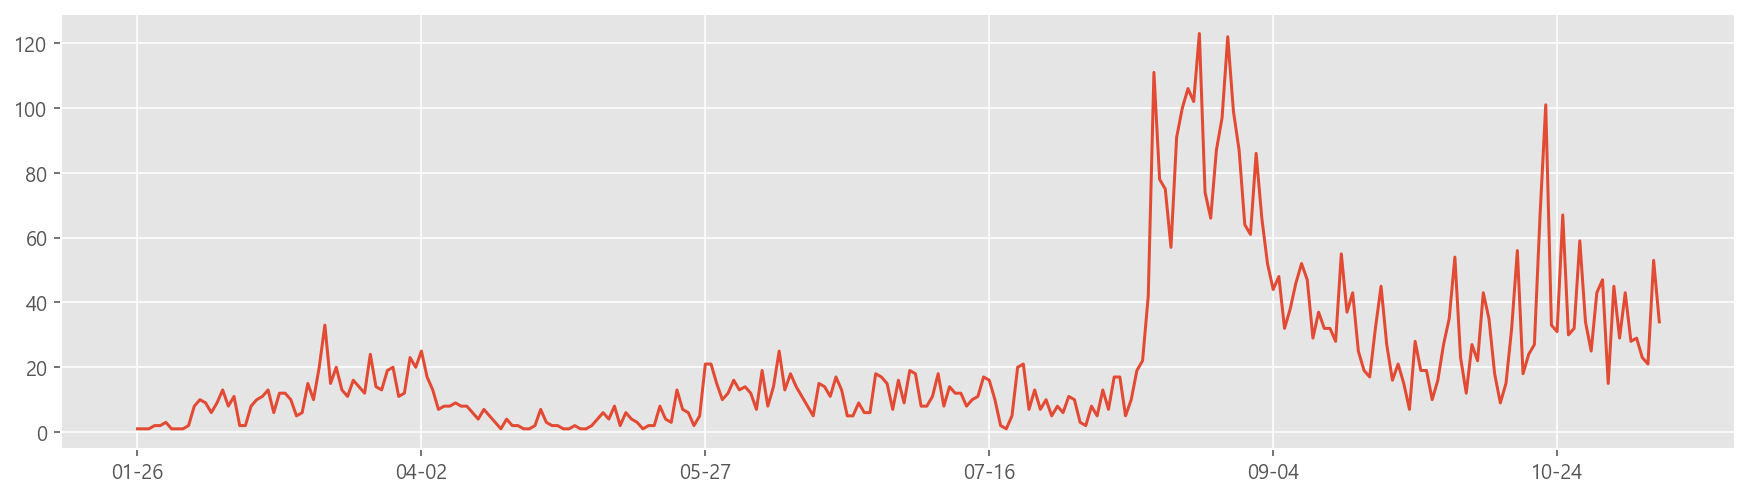

In [111]:
#sort_index= susun ikut tarikh
df['월일'].value_counts().sort_index().plot(figsize=(15,4))

In [112]:
day_count[day_count > 100]

2020-08-22    123
2020-08-27    122
2020-08-14    111
2020-08-20    106
2020-08-21    102
2020-10-22    101
Name: 확진일자, dtype: int64

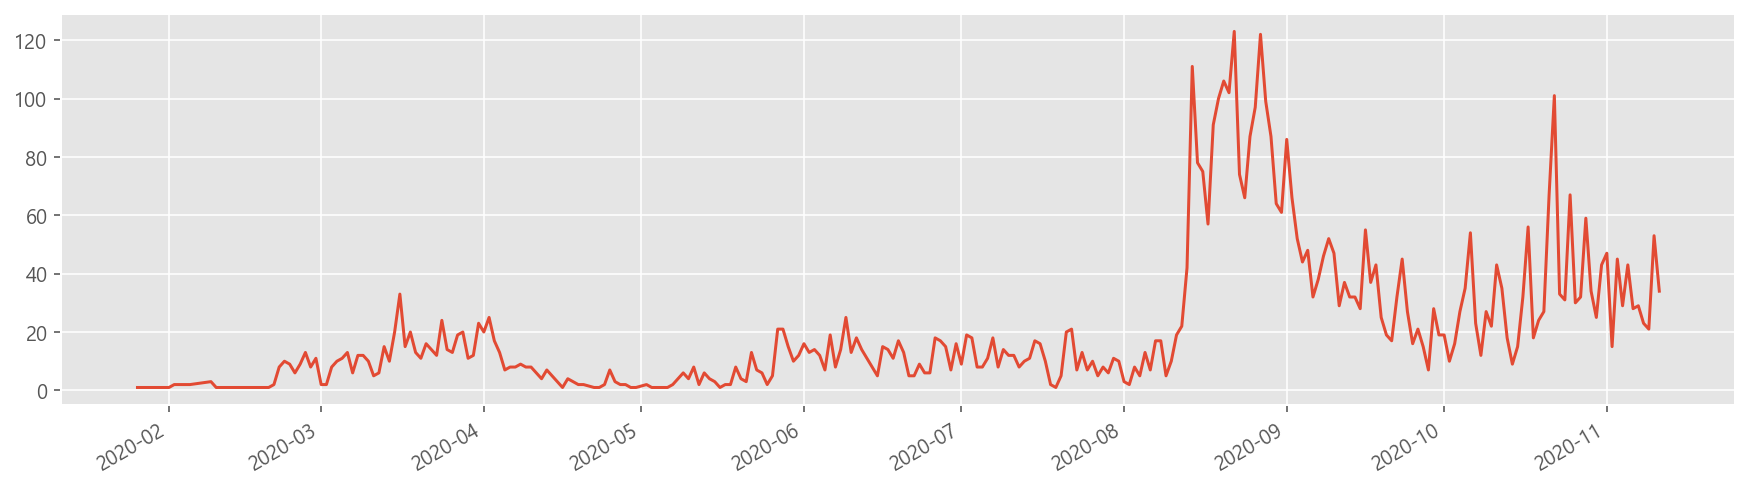

In [113]:
g = day_count.plot(figsize=(15, 4))

In [114]:
df["확진일자"]

0      2020-01-26
1      2020-01-27
2      2020-02-01
3      2020-02-02
4      2020-02-02
          ...    
5810   2020-11-11
5811   2020-11-11
5812   2020-11-01
5813   2020-11-11
5814   2020-11-11
Name: 확진일자, Length: 5815, dtype: datetime64[ns]

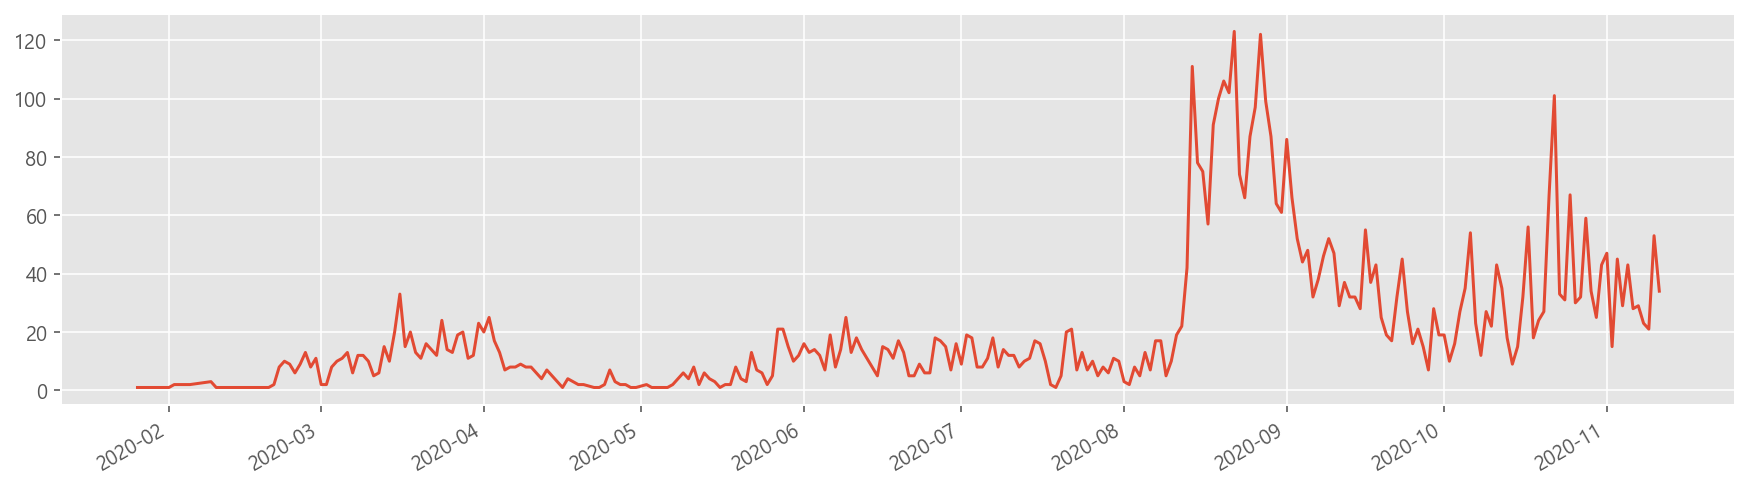

In [115]:
g = day_count.plot(figsize=(15, 4))

In [123]:
# g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(day_count.iloc[i])
#g.text(x="2020-01-31", y=case_count, s=case_count)

123
122
111
106
102
101
100
99
97
91
87
87
86
78
75
74
67
67
66
66
64
61
59
57
56
55
54
53
52
52
48
47
47
46
45
45
44
43
43
43
43
42
38
37
37
35
35
34
34
33
33
32
32
32
32
32
32
31
30
29
29
29
28
28
28
27
27
27
27
25
25
25
25
24
24
23
23
23
22
22
21
21
21
21
21


## 확진자가 가장 많이 나온 날

In [124]:
day_count.max()

123

In [125]:
day_count.describe()

count    269.000000
mean      21.617100
std       24.125261
min        1.000000
25%        7.000000
50%       13.000000
75%       27.000000
max      123.000000
Name: 확진일자, dtype: float64

In [126]:
# 확진자가 가장 많았던 날을 찾습니다.
feq_max_day = day_count[day_count == 123]
feq_max_day.index

DatetimeIndex(['2020-08-22'], dtype='datetime64[ns]', freq=None)

In [127]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df[df["확진일자"] == '2020-08-22']

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1,월,주,월일
2372,2373,16971.0,M,67,60,2020-08-22,2020. 8. 20.,NaN,성남-254,성남중원,NaN,불명확,grp732,접촉자,타지역에서primary가있는건,접촉자,8,34,08-22
2417,2418,16994.0,F,62,60,2020-08-22,2020. 8. 17.,NaN,성남-256,성남분당,NaN,불명확,grp618,접촉자,NaN,접촉자,8,34,08-22
2424,2425,17062.0,F,73,70,2020-08-22,NaN,무증상,안성-17,안성,NaN,불명확,grp696,접촉자,NaN,접촉자,8,34,08-22
2426,2427,17032.0,M,69,60,2020-08-22,2020. 8. 21.,NaN,군포-99,군포,NaN,불명확,grp705,접촉자,NaN,접촉자,8,34,08-22
2427,2428,17079.0,M,87,80,2020-08-22,2020. 8. 18.,NaN,가평-31,가평,NaN,불명확,grp618,접촉자,NaN,접촉자,8,34,08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,2701,17780.0,F,42,40,2020-08-22,2020. 8. 19.,NaN,평택-219,평택,NaN,해외유입,grp811,Primary,NaN,Primary,8,34,08-22
2701,2702,17773.0,F,24,20,2020-08-22,NaN,무증상,평택-220,평택,NaN,해외유입,grp812,Primary,NaN,Primary,8,34,08-22
2703,2704,17575.0,M,59,50,2020-08-22,NaN,무증상,고양-201,고양덕양,NaN,불명확,grp696,접촉자,NaN,접촉자,8,34,08-22
2704,2705,17558.0,F,56,50,2020-08-22,2020. 8. 19.,NaN,고양-202,고양덕양,NaN,불명확,grp696,접촉자,NaN,접촉자,8,34,08-22


## 막대그래프 그리기

In [128]:
day_count = df["월일"].value_counts()

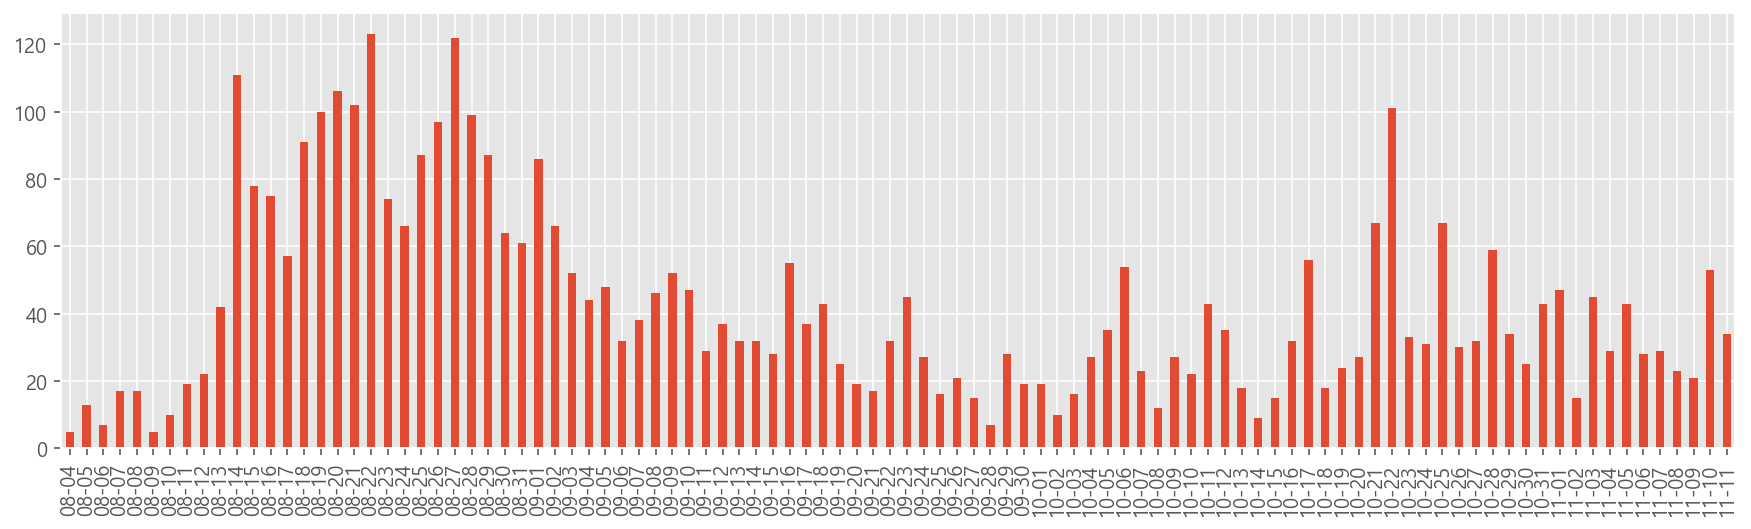

In [129]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
day_count.sort_index()[-100:].plot.bar(figsize=(15, 4))

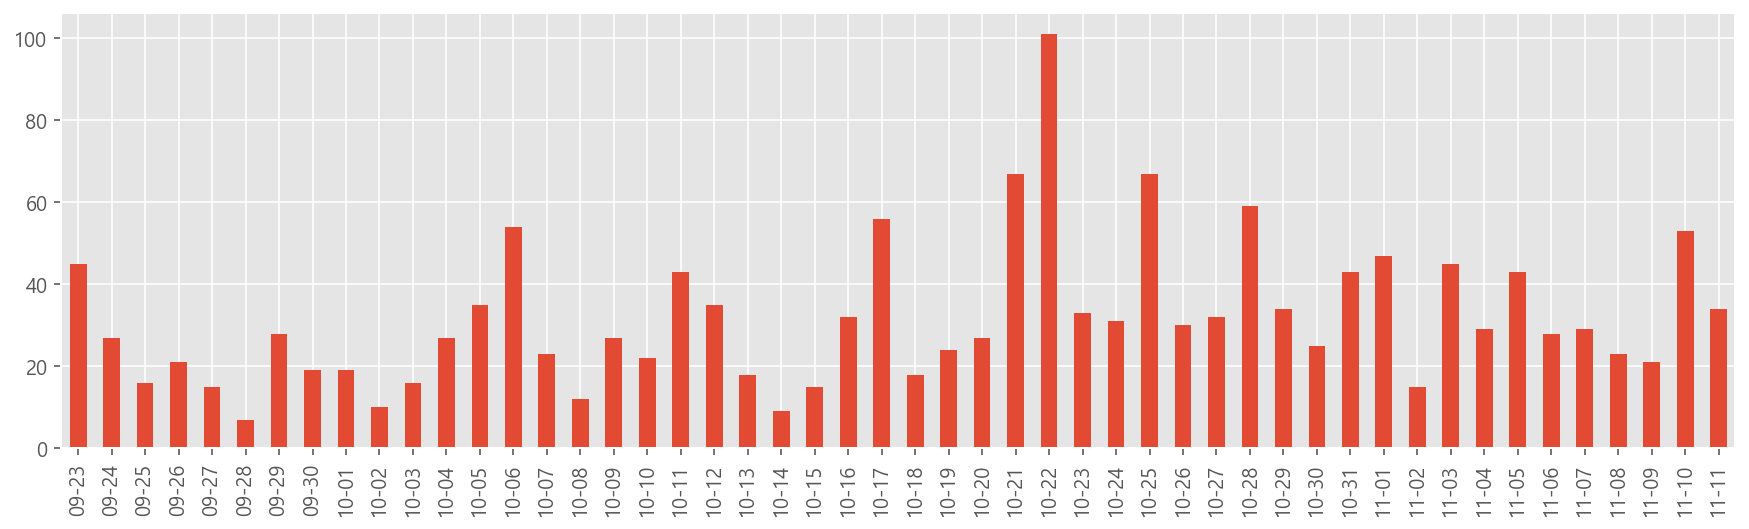

In [130]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

day_count.sort_index()[-50:].plot.bar(figsize=(15, 4))

## 월별 확진자 수 그리기

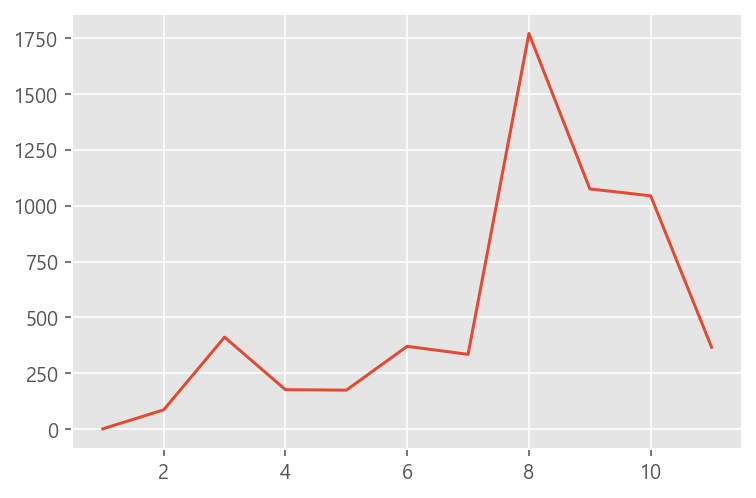

In [132]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.
month_count = df["월"].value_counts().sort_index()
month_count.plot()

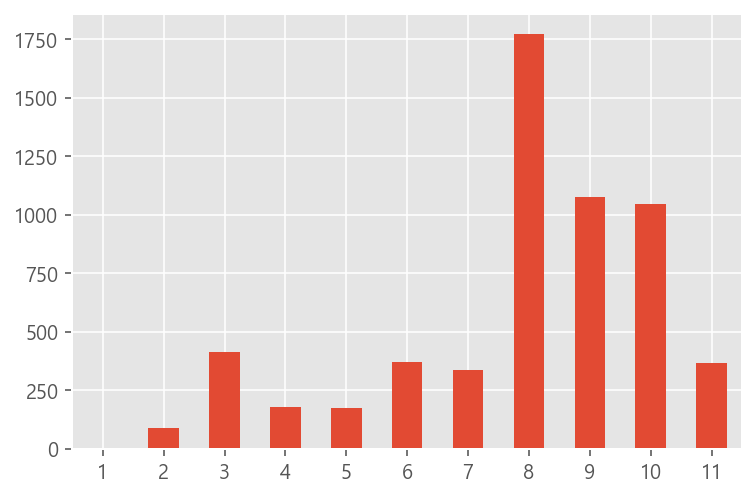

In [133]:
g = month_count.plot.bar(rot=0)

## 주단위 확진자수 그리기

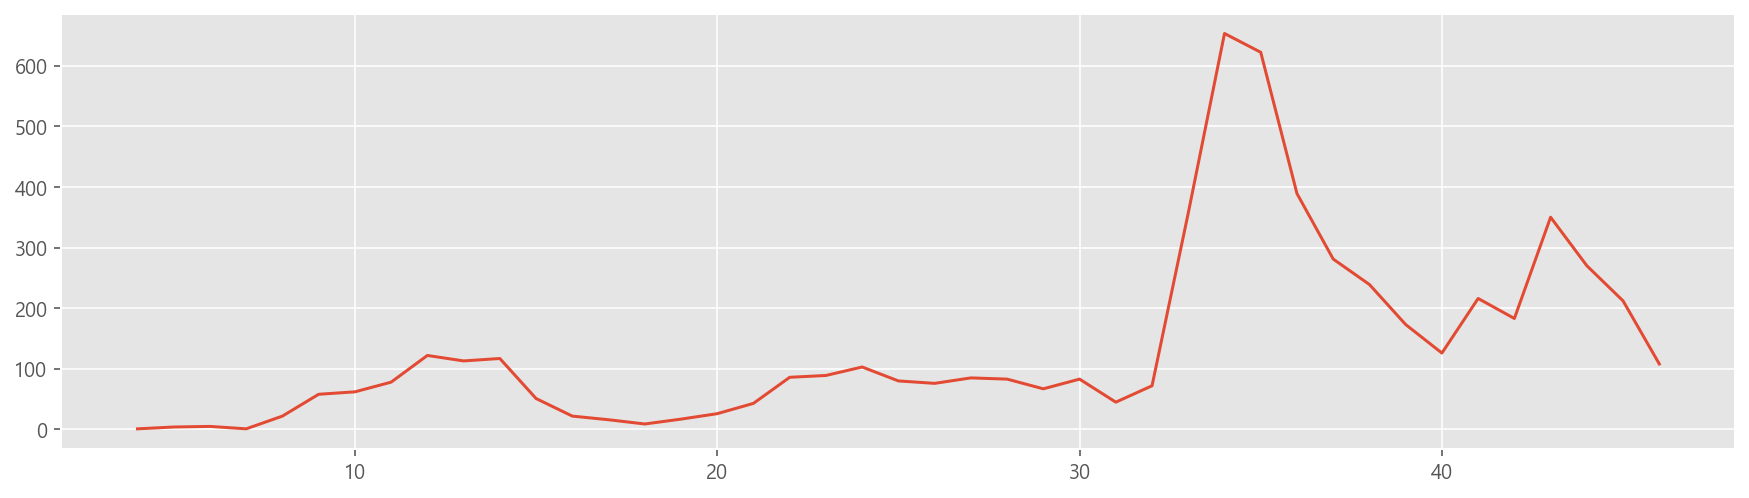

In [134]:
# 주별로 빈도수를 구합니다.
week_count = df["주"].value_counts().sort_index()
week_count.plot(figsize=(15, 4))

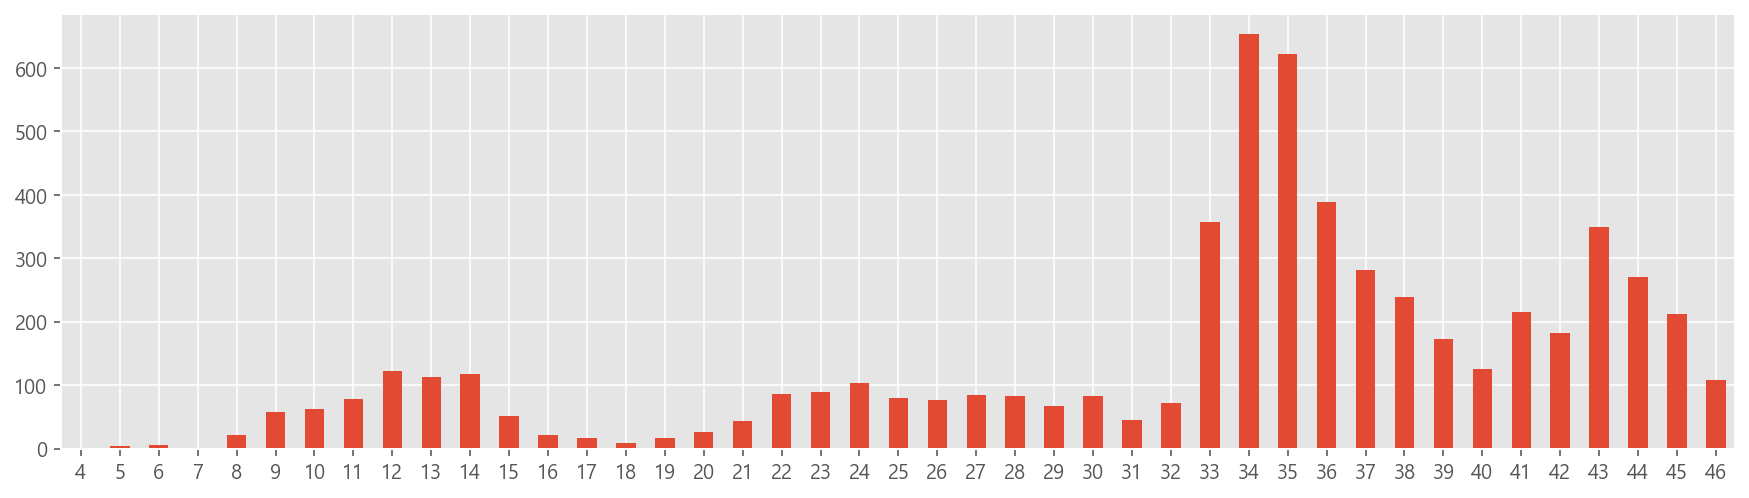

In [135]:
# 주단위 빈도수 막대그래프로 그리기

week_count.plot.bar(figsize=(15, 4), rot=0)

## 모든 날짜를 행에 만들어 주기

In [136]:
day_count = df["확진일자"].value_counts()

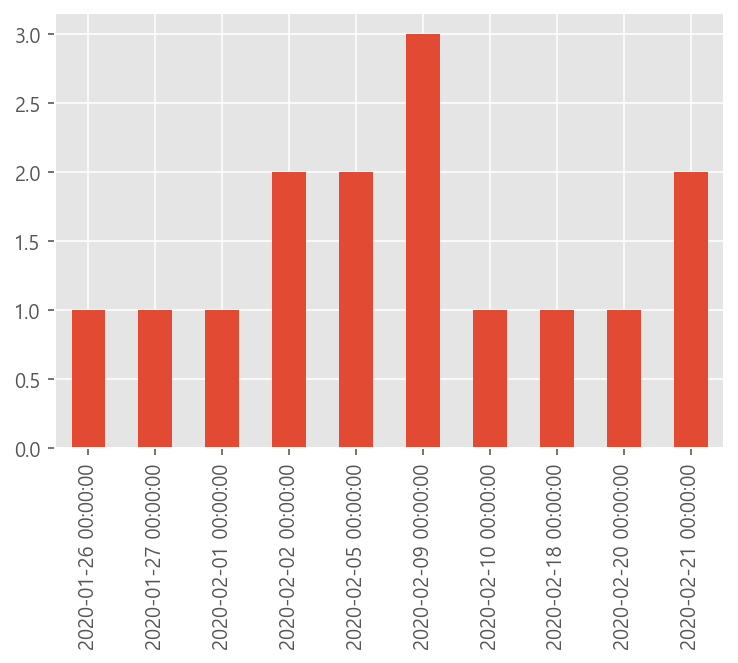

In [137]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

day_count = day_count.sort_index()
day_count[:10].plot.bar()

In [138]:
last_day = day_count.tail(1).index[0]
first_day = day_count.head(1).index[0]
last_day, first_day

(Timestamp('2020-11-11 00:00:00'), Timestamp('2020-01-26 00:00:00'))

In [139]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)

In [140]:
df_days = days.to_frame()
df_days.columns = ["연월일"]
df_days.head()

,연월일
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30


In [141]:
day_count

2020-01-26     1
2020-01-27     1
2020-02-01     1
2020-02-02     2
2020-02-05     2
              ..
2020-11-07    29
2020-11-08    23
2020-11-09    21
2020-11-10    53
2020-11-11    34
Name: 확진일자, Length: 269, dtype: int64

In [142]:
df_day_count = day_count.reset_index()
df_day_count.head()

,index,확진일자
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-05,2


In [143]:
df_day_count.columns = ["확진일", "확진수"]
df_day_count.head()

,확진일,확진수
0,2020-01-26,1
1,2020-01-27,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-05,2


In [144]:
df_days.head()

,연월일
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
2020-01-29,2020-01-29
2020-01-30,2020-01-30


## Merging Data 

In [145]:
df_merge = df_days.merge(df_day_count, left_on="연월일", right_on="확진일", how="left")
df_merge.head()

,연월일,확진일,확진수
0,2020-01-26,2020-01-26,1.0
1,2020-01-27,2020-01-27,1.0
2,2020-01-28,NaT,NaN
3,2020-01-29,NaT,NaN
4,2020-01-30,NaT,NaN


## 누적 확진자 수 구하기

In [147]:
df_all_day = df_merge[["연월일", "확진수"]].copy()
df_all_day["확진수"] = df_all_day["확진수"].fillna(0)
df_all_day.head()

,연월일,확진수
0,2020-01-26,1.0
1,2020-01-27,1.0
2,2020-01-28,0.0
3,2020-01-29,0.0
4,2020-01-30,0.0


In [148]:
df_all_day["월일"] = df_all_day["연월일"].map(lambda x : str(x)[5:10])
df_all_day

,연월일,확진수,월일
0,2020-01-26,1.0,01-26
1,2020-01-27,1.0,01-27
2,2020-01-28,0.0,01-28
3,2020-01-29,0.0,01-29
4,2020-01-30,0.0,01-30
...,...,...,...
286,2020-11-07,29.0,11-07
287,2020-11-08,23.0,11-08
288,2020-11-09,21.0,11-09
289,2020-11-10,53.0,11-10


In [149]:
df_all_day["누적확진"] = df_all_day["확진수"].cumsum()
df_all_day.tail()

,연월일,확진수,월일,누적확진
286,2020-11-07,29.0,11-07,5684.0
287,2020-11-08,23.0,11-08,5707.0
288,2020-11-09,21.0,11-09,5728.0
289,2020-11-10,53.0,11-10,5781.0
290,2020-11-11,34.0,11-11,5815.0


## 데이터프레임으로 그리기

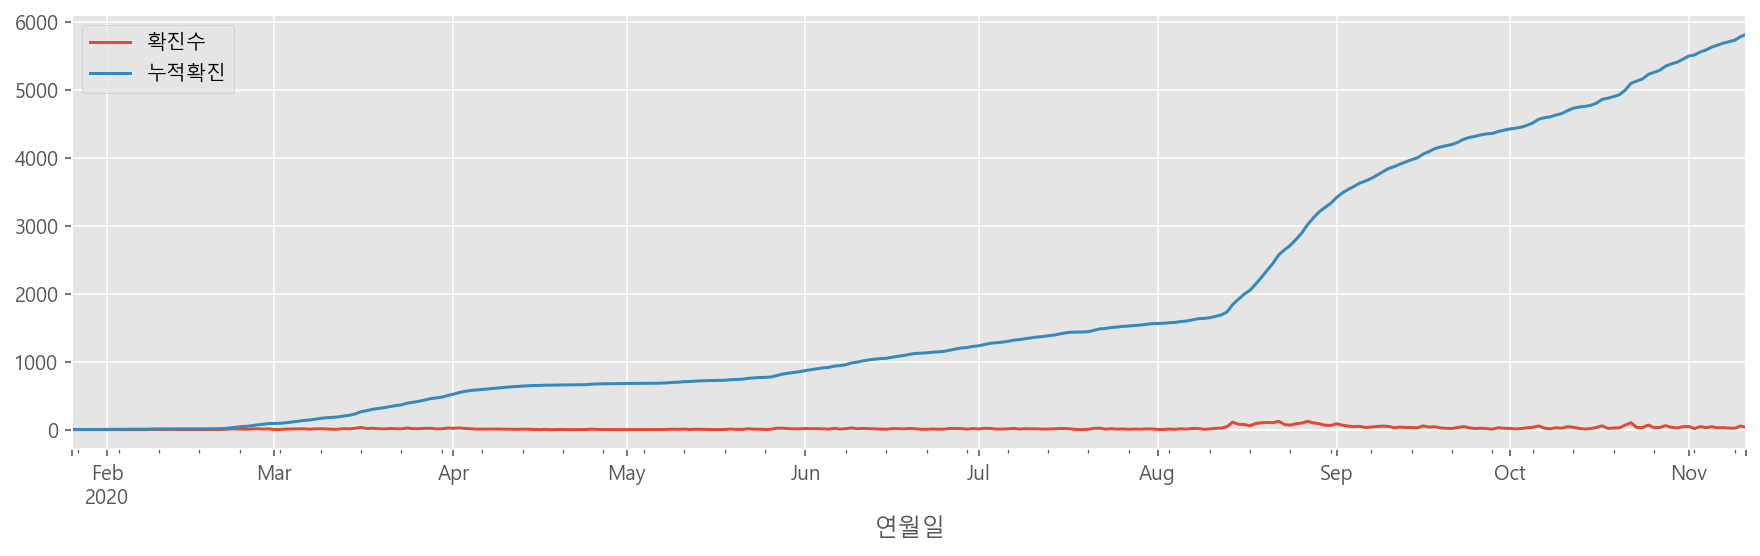

In [150]:
all_day = df_all_day.set_index("연월일")[["확진수", "누적확진"]]
all_day.plot(figsize=(15, 4))

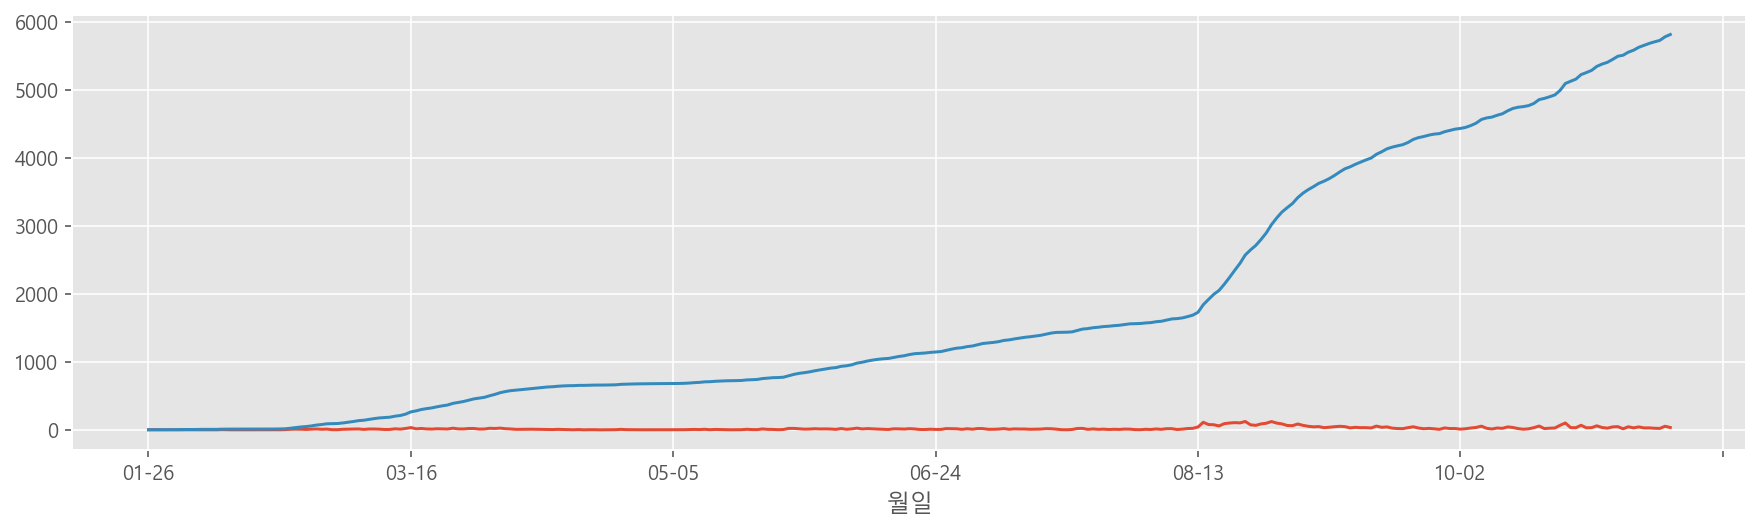

In [151]:
df_all_day.set_index("월일")["확진수"].plot(figsize=(15, 4))
df_all_day.set_index("월일")["누적확진"].plot()

## 확진수만 따로 그리기

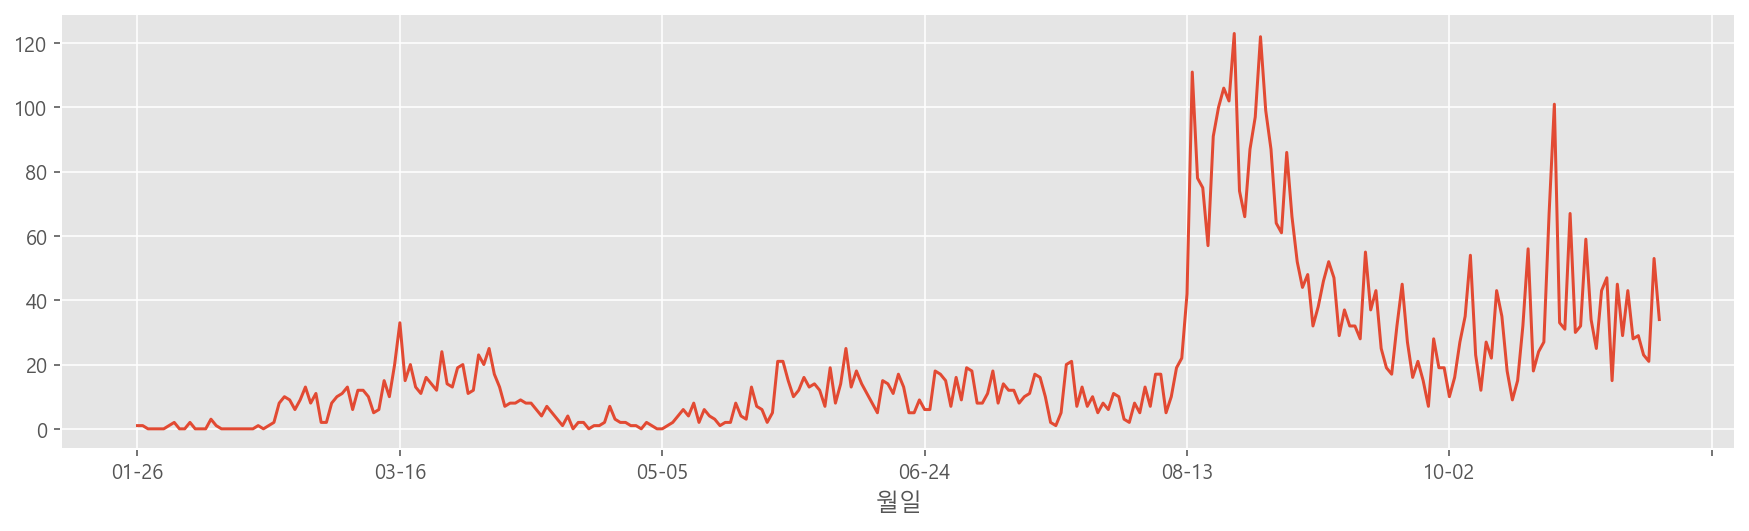

In [153]:
df_all_day.set_index("월일")["확진수"].plot(figsize=(15, 4))

## 누적확진만 따로 그리기

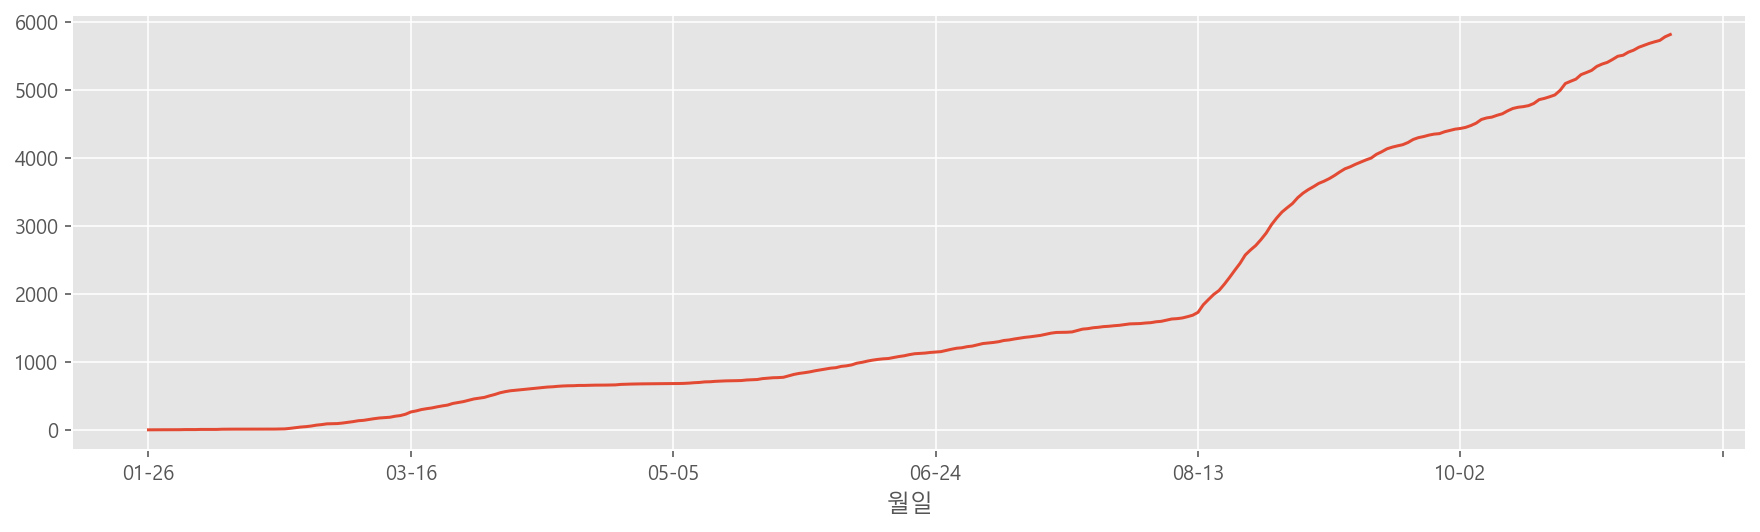

In [154]:
df_all_day.set_index("월일")["누적확진"].plot(figsize=(15, 4))

## 로그스케일`

In [157]:
import numpy as np

In [158]:
df_all_day["확진수_로그"] = np.log(df_all_day["확진수"] + 1)

In [159]:
df_all_day["누적확진_로그"] = np.log1p(df_all_day["누적확진"])

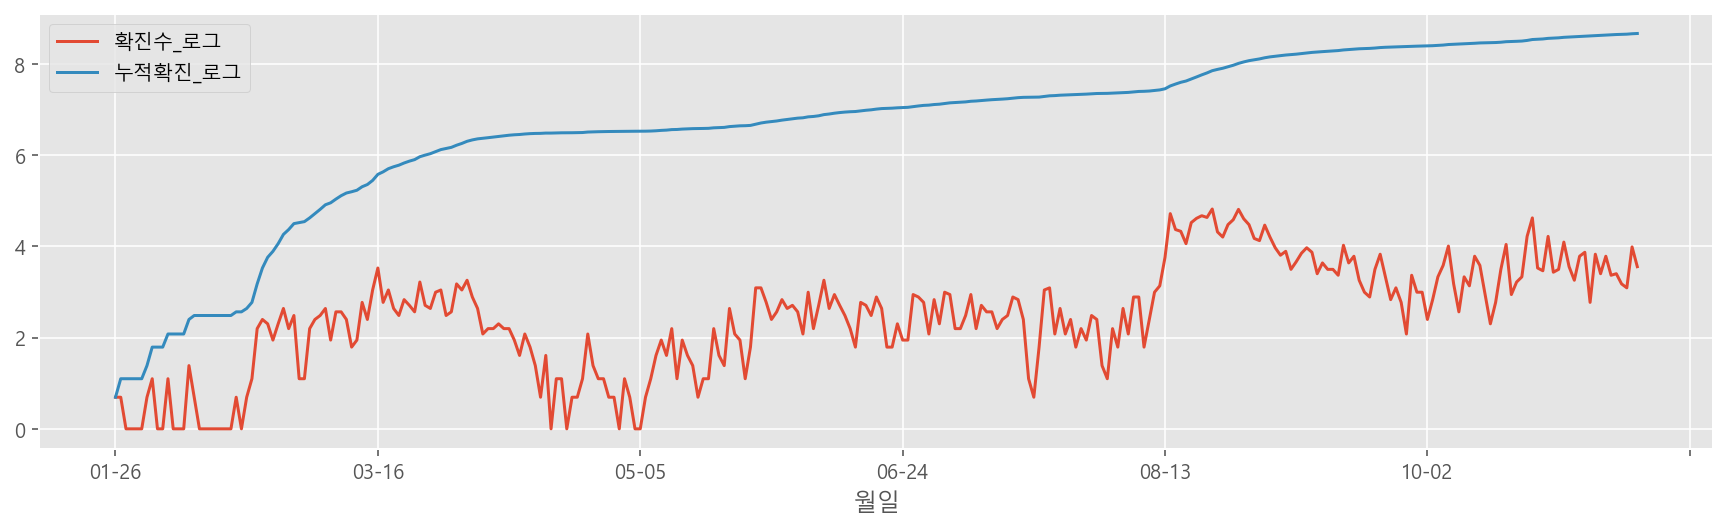

In [160]:
df_all_day.set_index("월일")[["확진수_로그", "누적확진_로그"]].plot(figsize=(15, 4))

## 확진월과 요일 구하기

In [161]:
df_all_day["월"] = df_all_day["연월일"].dt.month
df_all_day["요일"] = df_all_day["연월일"].dt.dayofweek
df_all_day.head()

,연월일,확진수,월일,누적확진,확진수_로그,누적확진_로그,월,요일
0,2020-01-26,1.0,01-26,1.0,0.693147,0.693147,1,6
1,2020-01-27,1.0,01-27,2.0,0.693147,1.098612,1,0
2,2020-01-28,0.0,01-28,2.0,0.000000,1.098612,1,1
3,2020-01-29,0.0,01-29,2.0,0.000000,1.098612,1,2
4,2020-01-30,0.0,01-30,2.0,0.000000,1.098612,1,3


In [162]:
df_all_day['월']= df_all_day['연월일'].dt.month
df_all_day['요일'] = df_all_day['연월일'].dt.dayofweek
df_all_day.head()

,연월일,확진수,월일,누적확진,확진수_로그,누적확진_로그,월,요일
0,2020-01-26,1.0,01-26,1.0,0.693147,0.693147,1,6
1,2020-01-27,1.0,01-27,2.0,0.693147,1.098612,1,0
2,2020-01-28,0.0,01-28,2.0,0.000000,1.098612,1,1
3,2020-01-29,0.0,01-29,2.0,0.000000,1.098612,1,2
4,2020-01-30,0.0,01-30,2.0,0.000000,1.098612,1,3


## 요일별 확진 수

In [164]:
df_all_day['요일'].value_counts()

6    42
2    42
1    42
0    42
5    41
4    41
3    41
Name: 요일, dtype: int64

In [165]:
# 월별, 요일별 확진수를 groupby로 구하기
g = df_all_day.groupby(['월','요일'])['확진수'].sum()
g

월   요일
1   0      1.0
    1      0.0
    2      0.0
    3      0.0
    4      0.0
          ... 
11  2     63.0
    3     43.0
    4     28.0
    5     29.0
    6     70.0
Name: 확진수, Length: 76, dtype: float64

In [166]:
month_week = g.unstack()
month_week

요일,0,1,2,3,4,5,6
월,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,NaN,1.0
2,10.0,7.0,11.0,14.0,10.0,20.0,15.0
3,71.0,80.0,49.0,43.0,58.0,52.0,59.0
4,19.0,15.0,34.0,36.0,31.0,26.0,16.0
5,12.0,15.0,32.0,30.0,35.0,26.0,25.0
6,47.0,78.0,47.0,47.0,56.0,60.0,36.0
7,31.0,57.0,61.0,67.0,63.0,29.0,27.0
8,202.0,202.0,232.0,277.0,329.0,308.0,220.0
9,94.0,220.0,237.0,163.0,132.0,131.0,98.0


In [167]:
dayofweek = '월 화 수 목 금 토 일'
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [170]:
month_week.columns = dayofweek
month_week

,월,화,수,목,금,토,일
월,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,NaN,1.0
2,10.0,7.0,11.0,14.0,10.0,20.0,15.0
3,71.0,80.0,49.0,43.0,58.0,52.0,59.0
4,19.0,15.0,34.0,36.0,31.0,26.0,16.0
5,12.0,15.0,32.0,30.0,35.0,26.0,25.0
6,47.0,78.0,47.0,47.0,56.0,60.0,36.0
7,31.0,57.0,61.0,67.0,63.0,29.0,27.0
8,202.0,202.0,232.0,277.0,329.0,308.0,220.0
9,94.0,220.0,237.0,163.0,132.0,131.0,98.0


In [239]:
month_week.style.background_gradient(cmap='Greens') #############

,월,화,수,목,금,토,일
월,,,,,,,
1,1.000000,0.000000,0.000000,0.000000,0.000000,nan,1.000000
2,10.000000,7.000000,11.000000,14.000000,10.000000,20.000000,15.000000
3,71.000000,80.000000,49.000000,43.000000,58.000000,52.000000,59.000000
4,19.000000,15.000000,34.000000,36.000000,31.000000,26.000000,16.000000
5,12.000000,15.000000,32.000000,30.000000,35.000000,26.000000,25.000000
6,47.000000,78.000000,47.000000,47.000000,56.000000,60.000000,36.000000
7,31.000000,57.000000,61.000000,67.000000,63.000000,29.000000,27.000000
8,202.000000,202.000000,232.000000,277.000000,329.000000,308.000000,220.000000
9,94.000000,220.000000,237.000000,163.000000,132.000000,131.000000,98.000000


In [173]:
df_all_day.groupby(["월", "요일"])["확진수"].agg(["count", "sum", "mean", "std", "median"])

count   sum  mean        std  median
월  요일                                      
1  0       1   1.0   1.0        NaN     1.0
   1       1   0.0   0.0        NaN     0.0
   2       1   0.0   0.0        NaN     0.0
   3       1   0.0   0.0        NaN     0.0
   4       1   0.0   0.0        NaN     0.0
...      ...   ...   ...        ...     ...
11 2       2  63.0  31.5   3.535534    31.5
   3       1  43.0  43.0        NaN    43.0
   4       1  28.0  28.0        NaN    28.0
   5       1  29.0  29.0        NaN    29.0
   6       2  70.0  35.0  16.970563    35.0

[76 rows x 5 columns]

In [174]:
df_all_day.groupby(["월", "요일"])["확진수"].describe()

count  mean        std   min    25%   50%    75%   max
월  요일                                                        
1  0     1.0   1.0        NaN   1.0   1.00   1.0   1.00   1.0
   1     1.0   0.0        NaN   0.0   0.00   0.0   0.00   0.0
   2     1.0   0.0        NaN   0.0   0.00   0.0   0.00   0.0
   3     1.0   0.0        NaN   0.0   0.00   0.0   0.00   0.0
   4     1.0   0.0        NaN   0.0   0.00   0.0   0.00   0.0
...      ...   ...        ...   ...    ...   ...    ...   ...
11 2     2.0  31.5   3.535534  29.0  30.25  31.5  32.75  34.0
   3     1.0  43.0        NaN  43.0  43.00  43.0  43.00  43.0
   4     1.0  28.0        NaN  28.0  28.00  28.0  28.00  28.0
   5     1.0  29.0        NaN  29.0  29.00  29.0  29.00  29.0
   6     2.0  35.0  16.970563  23.0  29.00  35.0  41.00  47.0

[76 rows x 8 columns]

## 2. 지역별 확진자 
* only take the 20th highest area 

In [195]:
area_count = df['지역'].value_counts().head(20)
area_count

부천       424
평택       366
의정부      269
광주       241
성남분당     240
고양덕양     234
용인기흥     212
군포       201
성남수정     186
남양주풍양    179
화성       169
김포       167
고양일산동    167
안양동안     158
시흥       158
파주       148
용인수지     147
광명       136
포천       135
안양만안     135
Name: 지역, dtype: int64

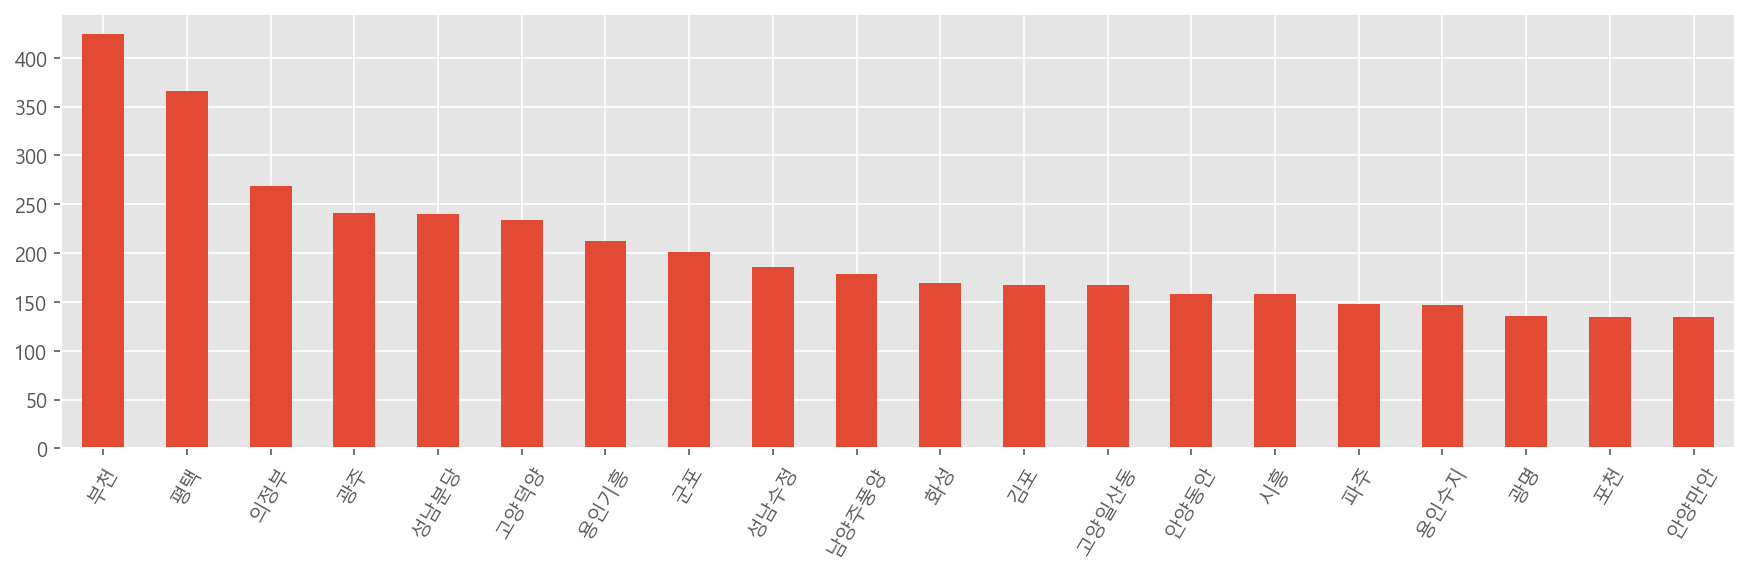

In [190]:
area_count.plot.bar(rot=60, figsize=(15,4))

In [191]:
area_list = area_count.index.tolist()
area_list

['부천',
 '평택',
 '의정부',
 '광주',
 '성남분당',
 '고양덕양',
 '용인기흥',
 '군포',
 '성남수정',
 '남양주풍양',
 '화성',
 '김포',
 '고양일산동',
 '안양동안',
 '시흥',
 '파주',
 '용인수지',
 '광명',
 '포천',
 '안양만안']

In [198]:
df_area_count = area_count.reset_index()
df_area_count.columns = ['지역','확진수']
df_area_count

,지역,확진수
0,부천,424
1,평택,366
2,의정부,269
3,광주,241
4,성남분당,240
5,고양덕양,234
6,용인기흥,212
7,군포,201
8,성남수정,186
9,남양주풍양,179


In [199]:
len(df_area_count)

20

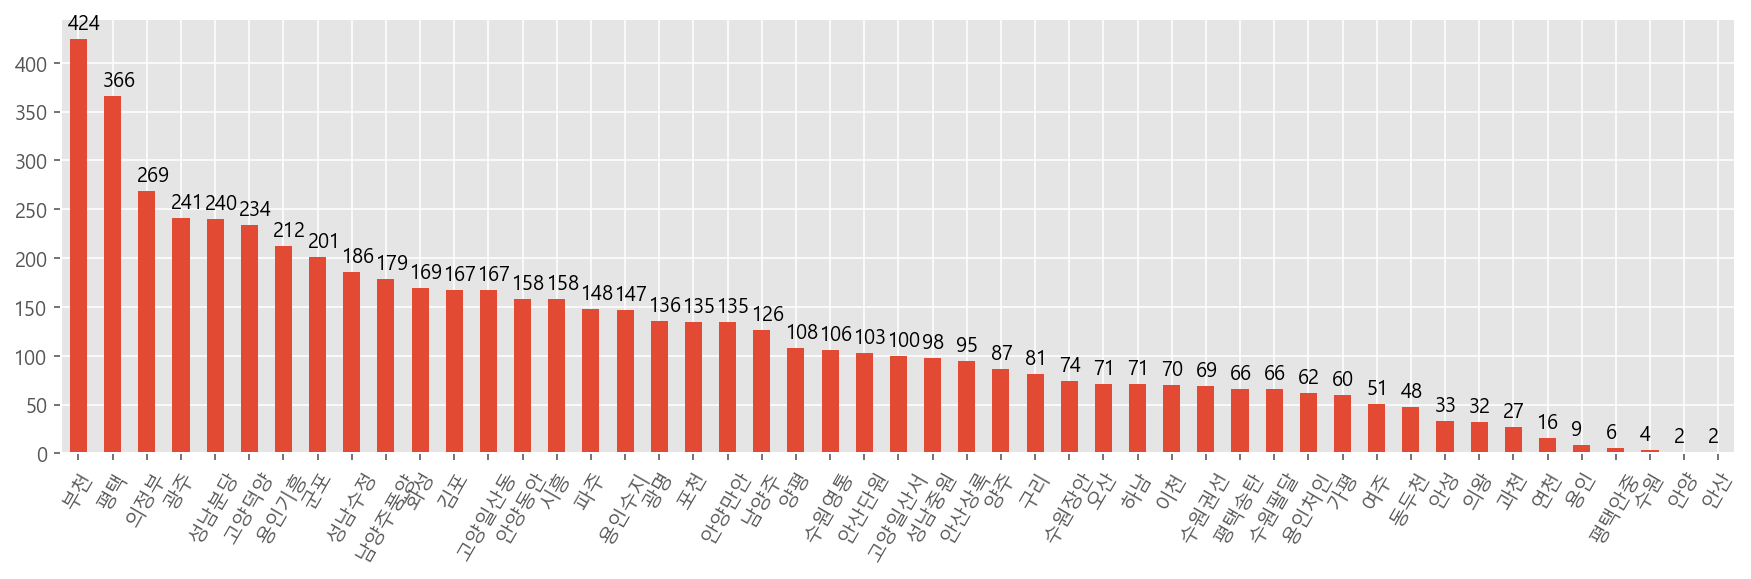

In [201]:
area_count = df["지역"].value_counts()
g = area_count.plot.bar(figsize=(15, 4), rot=60)

for i, gc in enumerate(area_count):
    g.text(x=i-0.3, y=gc+10, s=gc)

In [202]:
for index_num, val in enumerate(area_count):
    print(index_num, val)

0 424
1 366
2 269
3 241
4 240
5 234
6 212
7 201
8 186
9 179
10 169
11 167
12 167
13 158
14 158
15 148
16 147
17 136
18 135
19 135
20 126
21 108
22 106
23 103
24 100
25 98
26 95
27 87
28 81
29 74
30 71
31 71
32 70
33 69
34 66
35 66
36 62
37 60
38 51
39 48
40 33
41 32
42 27
43 16
44 9
45 6
46 4
47 2
48 2


## 3. 감염경로 분석

In [208]:
df['감염경로'].value_counts()

불명확        4846
해외유입        830
서울_콜센터       54
대구경북_일반      44
과천_신천지       22
대구_신천지       15
천안세종_줌바       4
Name: 감염경로, dtype: int64

In [209]:
df['감염경로'].value_counts(normalize=True)*100

불명확        83.336199
해외유입       14.273431
서울_콜센터      0.928633
대구경북_일반     0.756664
과천_신천지      0.378332
대구_신천지      0.257954
천안세종_줌바     0.068788
Name: 감염경로, dtype: float64

In [213]:
df.columns

Index(['연번', '확진자', '성별', '나이(만)', '연령대', '확진일자', '증상발현일', '무증상/조사중', '경기번호',
       '지역', '재검출', '감염경로', 'GRP', '구분', '구분2', '구분.1', '월', '주', '월일'],
      dtype='object')

In [219]:
group_contact = df.groupby(['월','감염경로'])['확진자'].count().unstack()
group_contact = group_contact.fillna(0).astype(int)
group_contact.style.background_gradient(cmap="Oranges")

감염경로,과천_신천지,대구_신천지,대구경북_일반,불명확,서울_콜센터,천안세종_줌바,해외유입
월,,,,,,,
1,0,0,0,0,0,0,2
2,11,14,34,17,0,0,11
3,11,1,10,228,53,4,105
4,0,0,0,82,1,0,94
5,0,0,0,149,0,0,26
6,0,0,0,313,0,0,58
7,0,0,0,163,0,0,172
8,0,0,0,1677,0,0,93
9,0,0,0,996,0,0,79


## 4)성별, 연령대별 확진자 현황 분석

In [226]:
df['성별'].value_counts()

F    2956
M    2859
Name: 성별, dtype: int64

In [230]:
df['성별'].describe()

count     5815
unique       2
top          F
freq      2956
Name: 성별, dtype: object

In [234]:
df['연령대'].value_counts() 

50     1064
60      972
20      929
30      758
40      734
70      489
10      333
0       252
80      234
90       48
100       2
Name: 연령대, dtype: int64

In [238]:
age_and_sex = pd.crosstab(df['성별'],df['연령대'])
age_and_sex.style.background_gradient(cmap='GnBu')

연령대,0,10,20,30,40,50,60,70,80,90,100
성별,,,,,,,,,,,
F,125,132,383,342,373,604,543,279,139,36,0
M,127,201,546,416,361,460,429,210,95,12,2
